# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

### Шаг 1. Откройте файлы с данными

In [ ]:
import pandas as pd
hotel_test = pd.read_csv('hotel_test.csv')
hotel_test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


In [ ]:
hotel_train = pd.read_csv('hotel_train.csv')
hotel_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


### Шаг 2. Предобработка и исследовательский анализ данных

In [ ]:
hotel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [ ]:
hotel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

Явных пропусков не вижу

In [ ]:
hotel_train.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,31.339772,15.847813,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,13.464024,8.748182,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,84121.000000,1.000000,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


И в целом все данные выглядят адекватными, нет "других данных(например(-1)), и минимальные и максимальные данные вполне вменяемые

arrival_date_month переведу в численный формат 1-12

In [ ]:
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
hotel_train['arrival_date_month'] = hotel_train['arrival_date_month'].map(month_map)
hotel_test['arrival_date_month'] = hotel_test['arrival_date_month'].map(month_map)

В целом закодирую все категориальные признаки в численные, но перед этим визуализирую все признаки

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numerical_cols = [col for col in hotel_train.columns
                 if col not in ['is_canceled']]

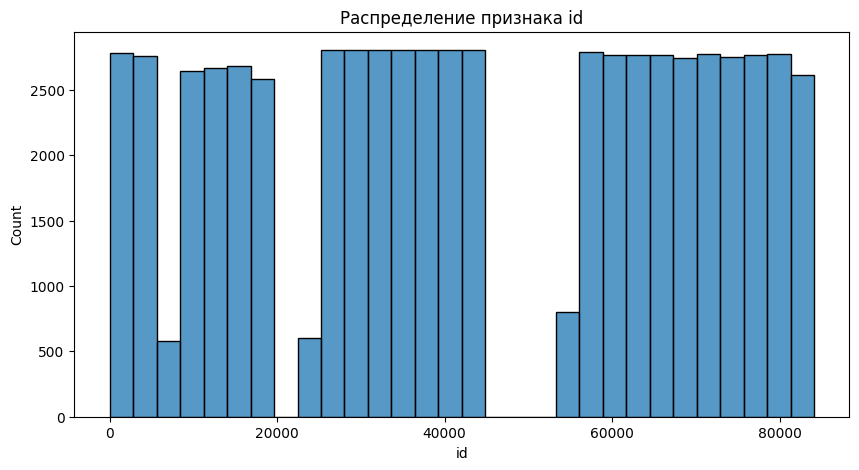

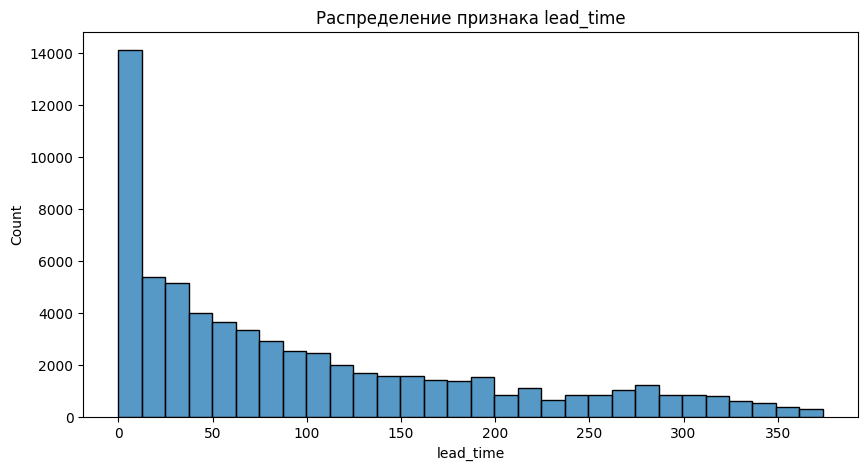

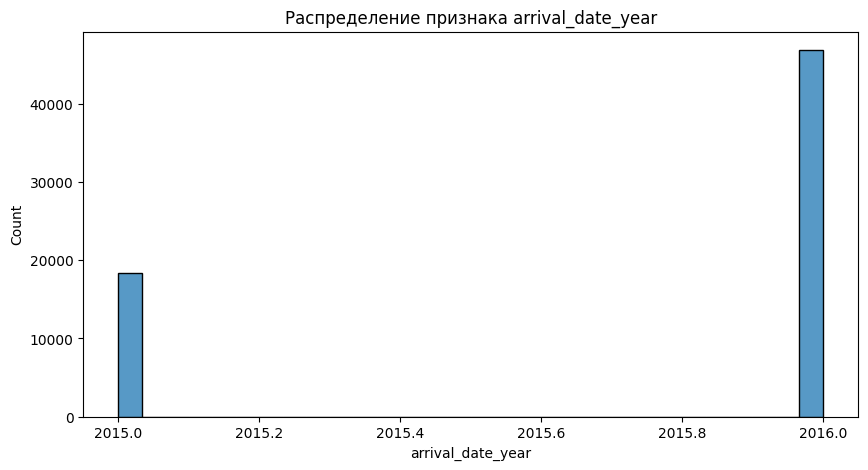

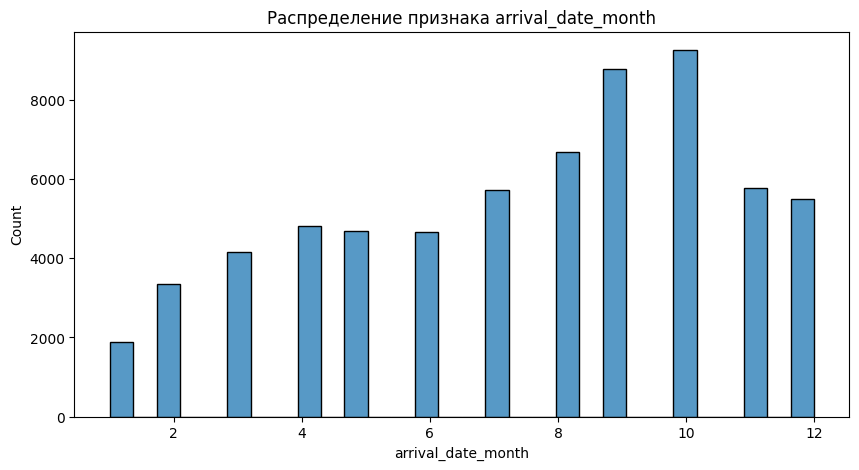

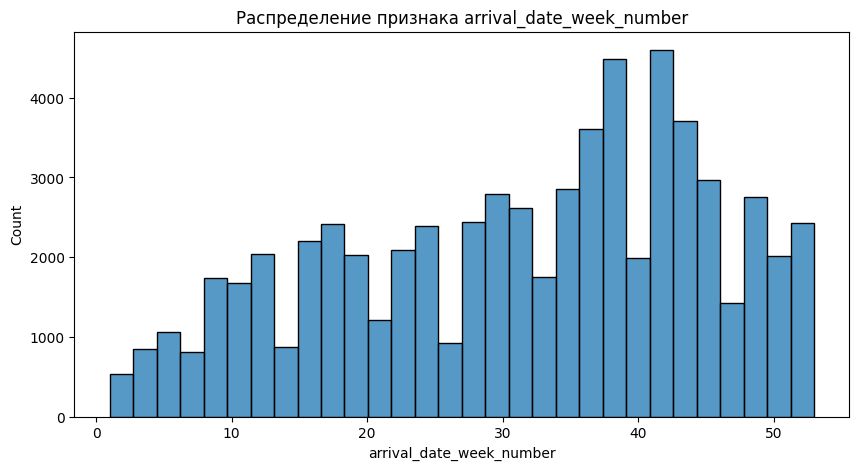

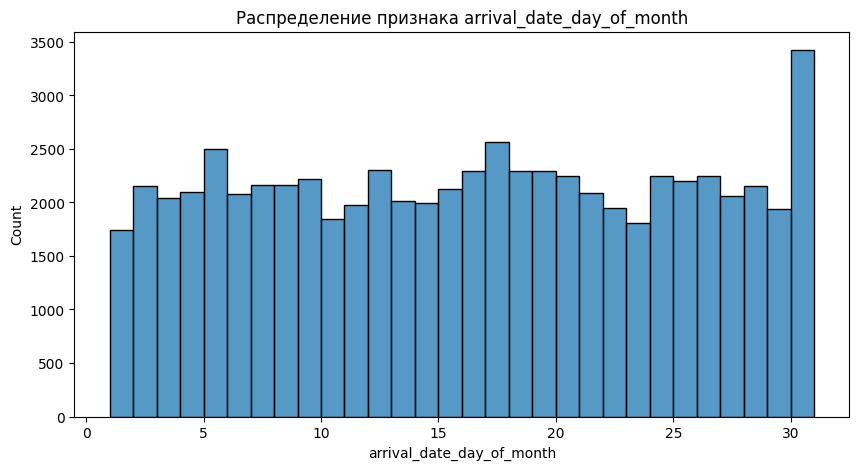

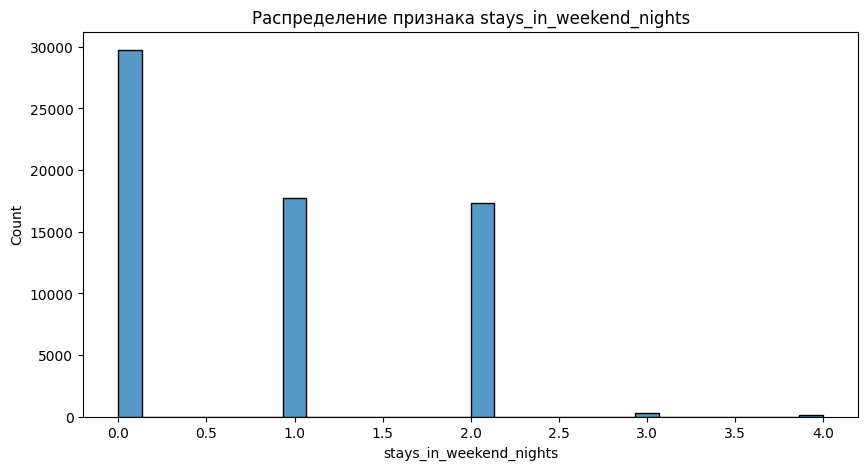

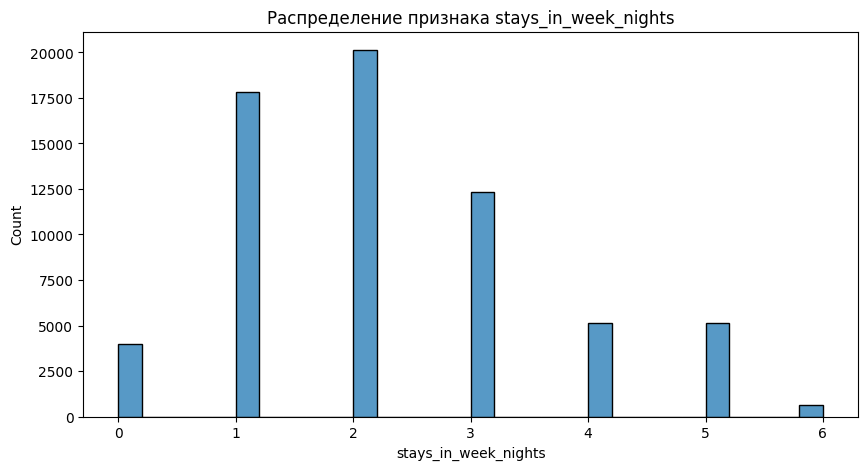

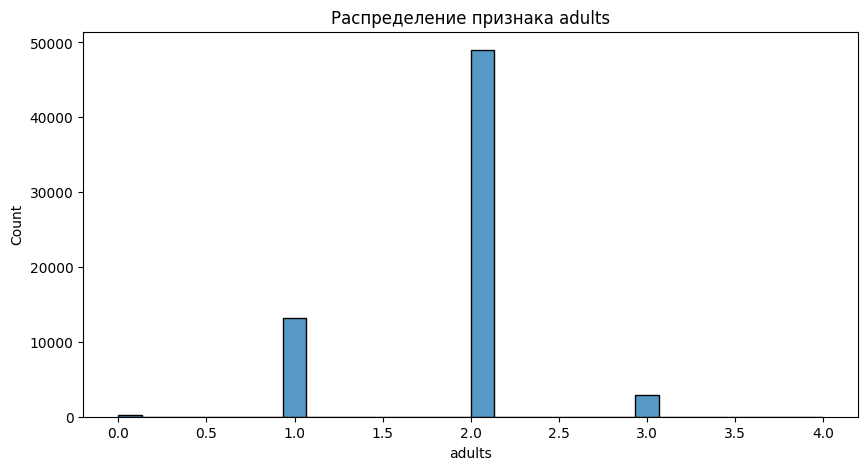

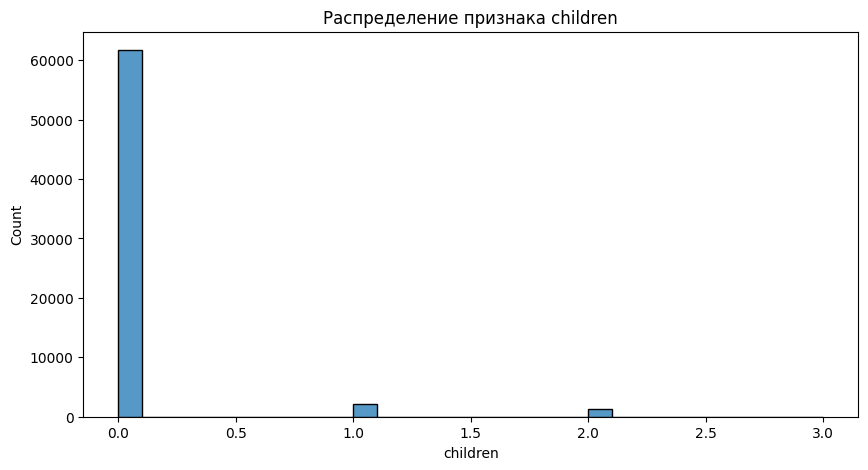

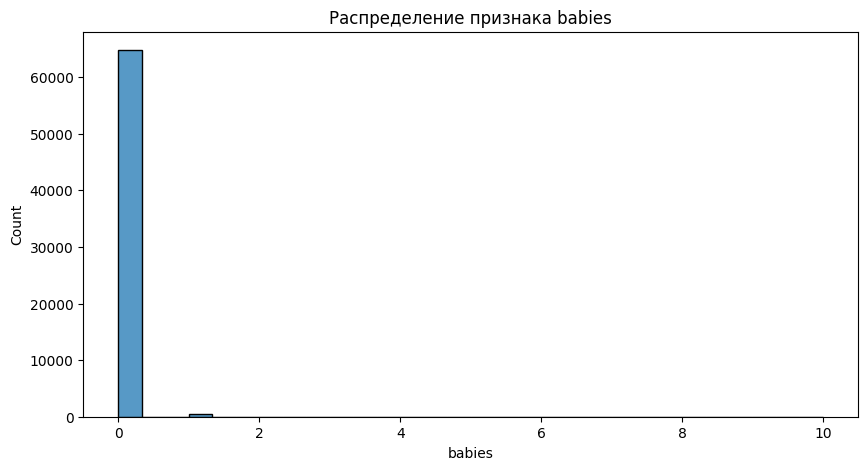

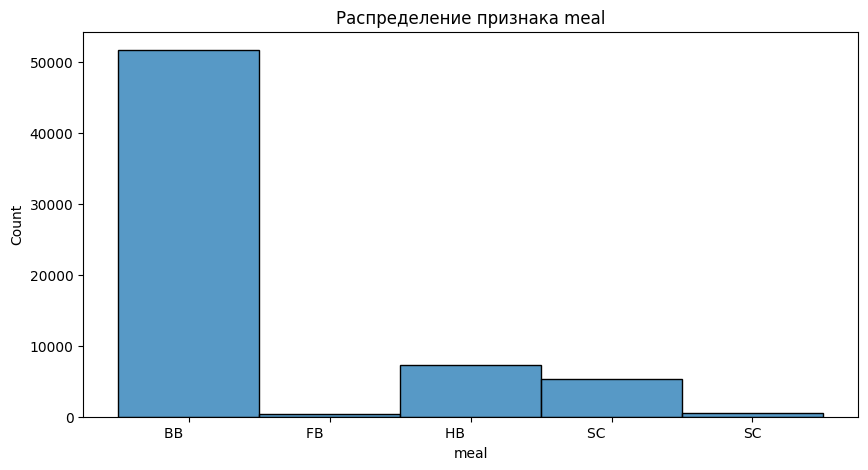

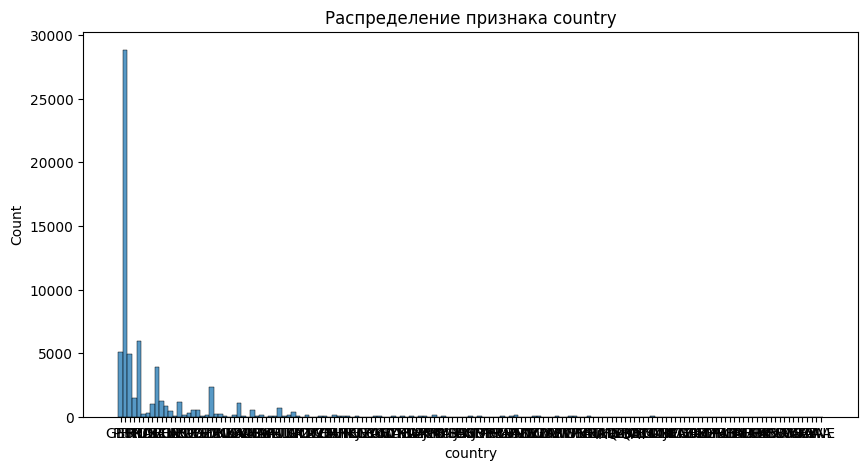

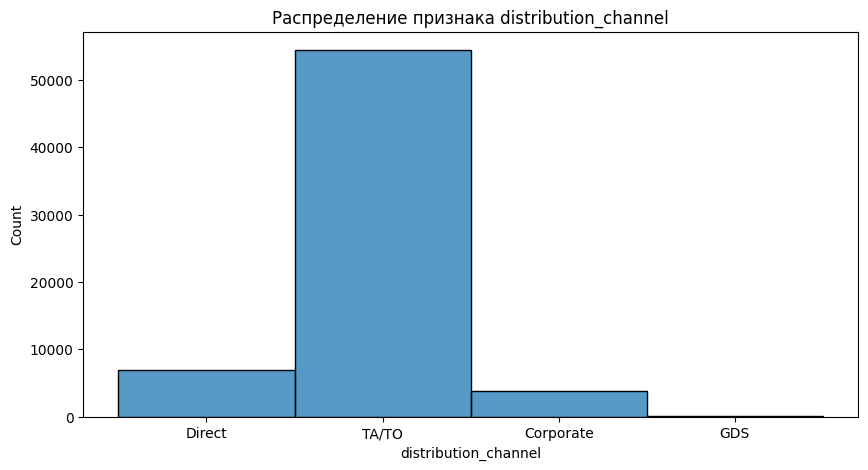

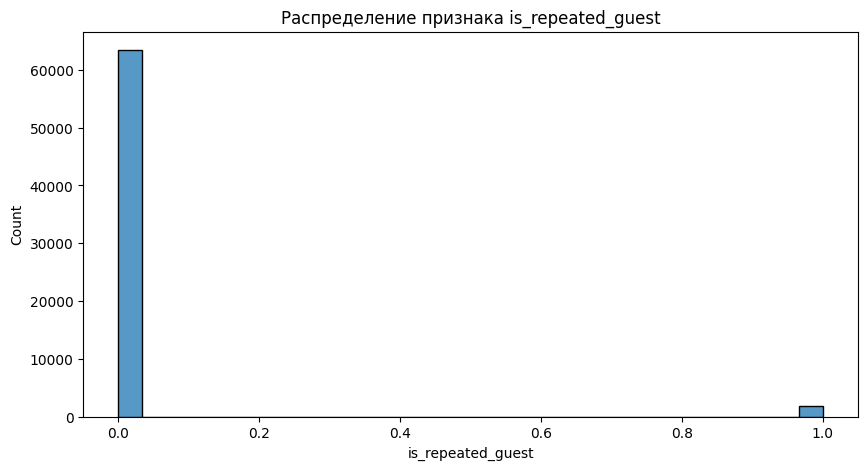

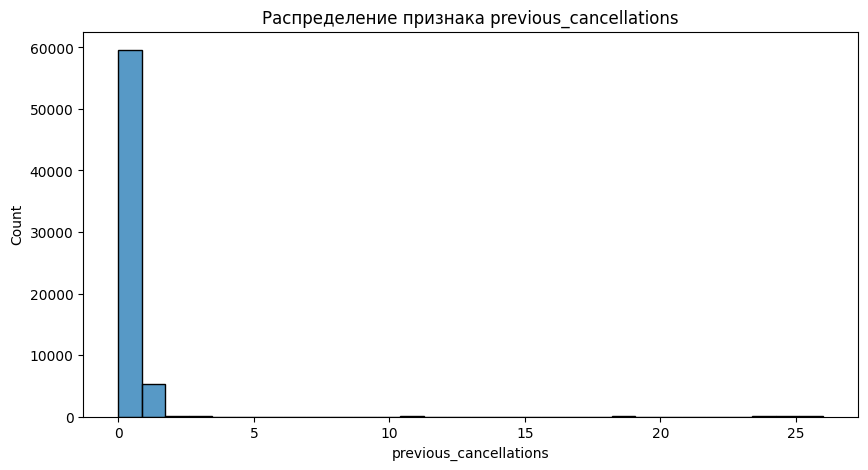

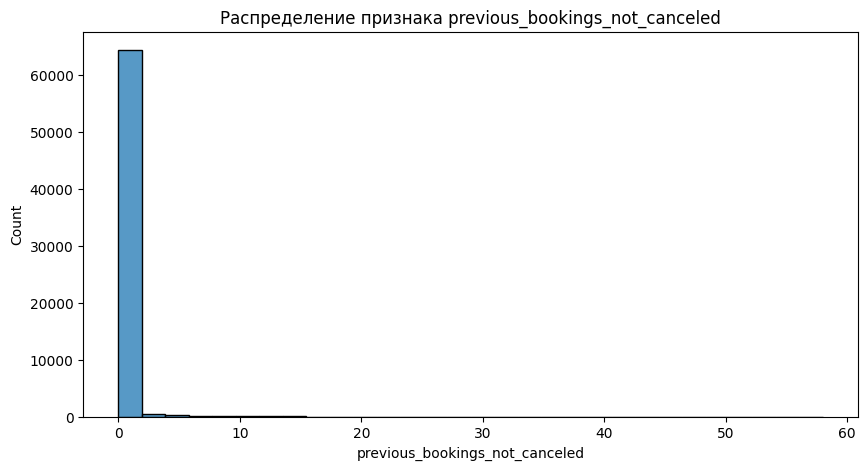

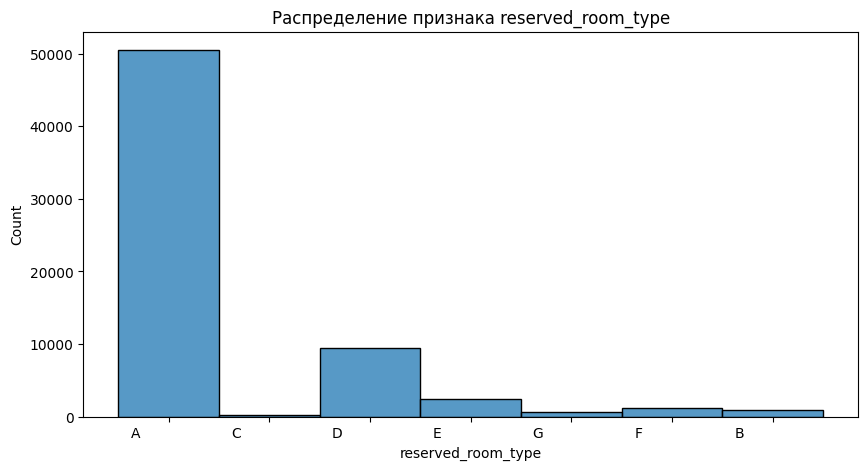

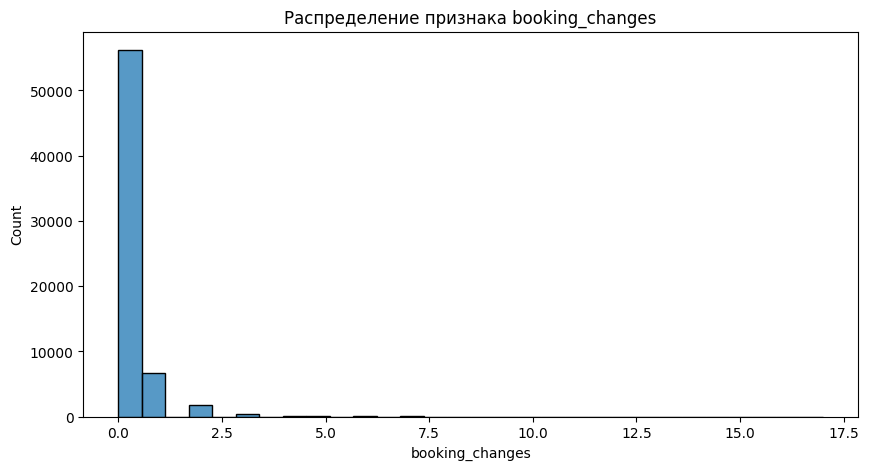

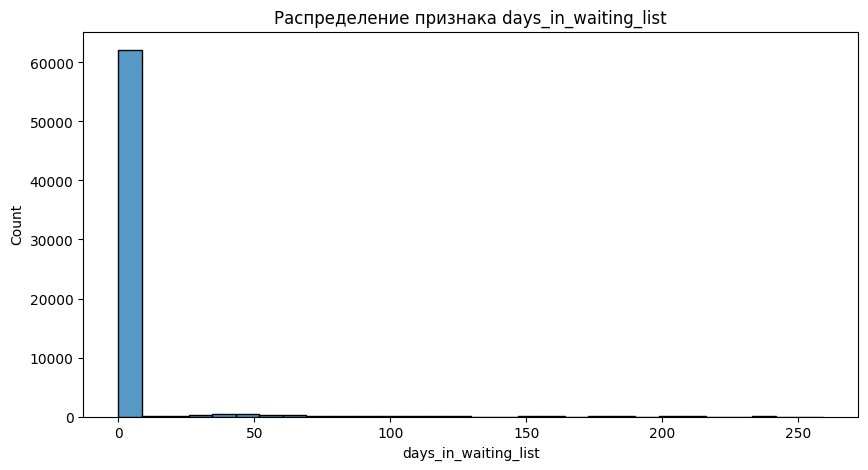

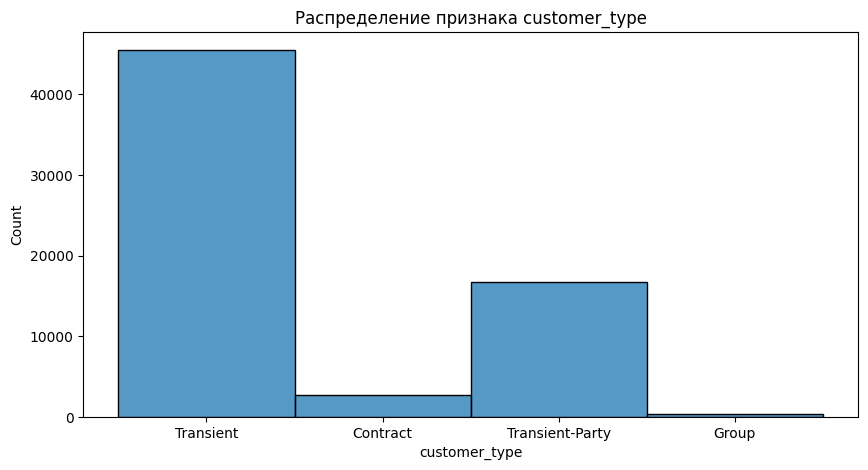

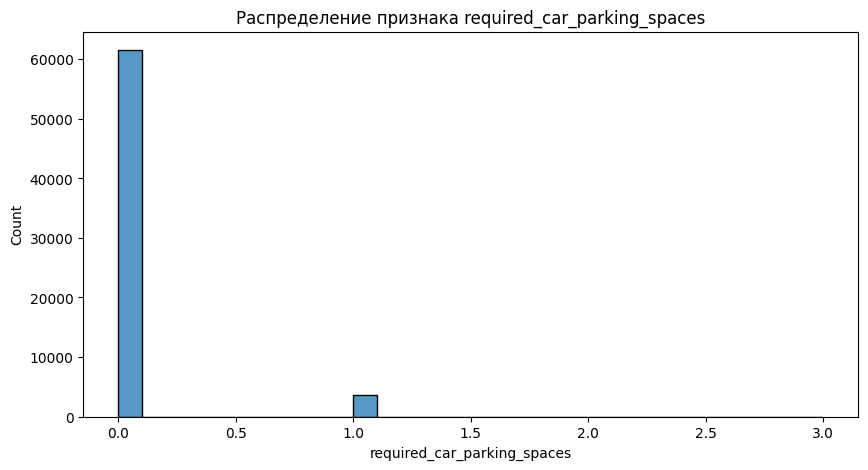

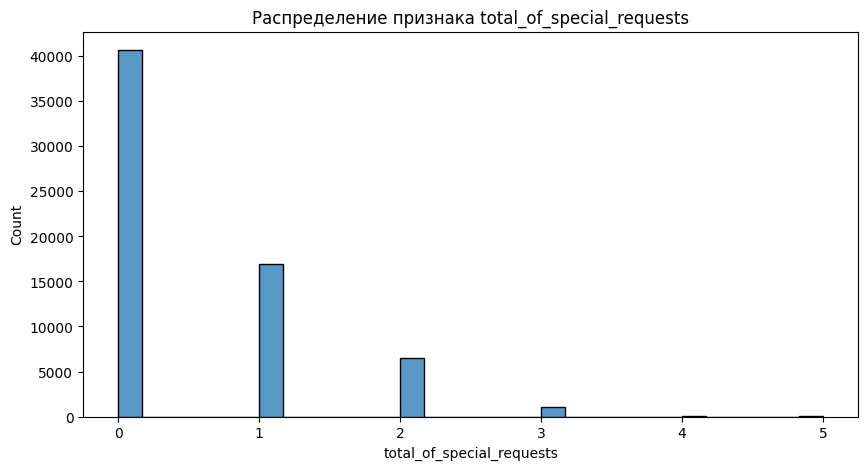

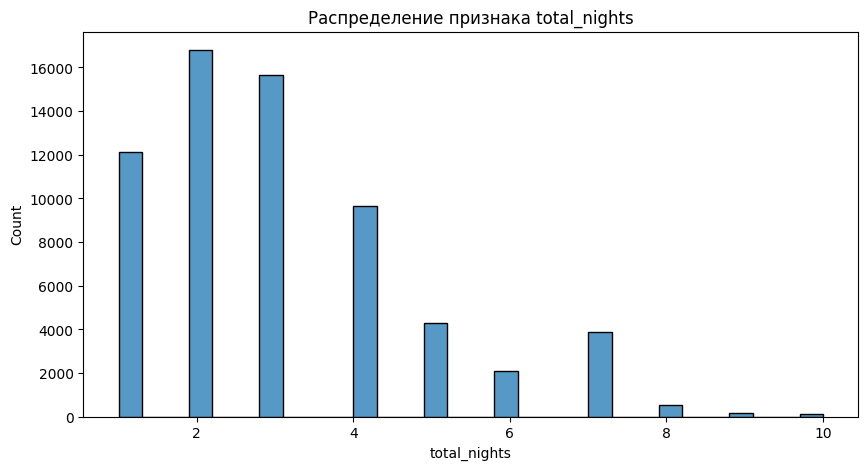

In [ ]:
for feature in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=hotel_train, x=feature, bins=30)
    plt.title(f'Распределение признака {feature}')
    plt.show()


По распределениям принимаю решения объеденю два признака детей и младенцев в один: наличие ребенка, так как большенство броней без них

In [ ]:
hotel_train['has_children'] = (hotel_train['children'] + hotel_train['babies'] > 0).astype(int)
hotel_test['has_children'] = (hotel_test['children'] + hotel_test['babies'] > 0).astype(int)

In [ ]:
hotel_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_children
0,0,0,7.0,2015,7,27,1,0,1,1.0,...,0,0,A,0,0,Transient,0,0,1,0
1,1,0,14.0,2015,7,27,1,0,2,2.0,...,0,0,A,0,0,Transient,0,1,2,0
2,2,0,0.0,2015,7,27,1,0,2,2.0,...,0,0,C,0,0,Transient,0,0,2,0
3,3,0,9.0,2015,7,27,1,0,2,2.0,...,0,0,C,0,0,Transient,0,1,2,0
4,4,1,85.0,2015,7,27,1,0,3,2.0,...,0,0,A,0,0,Transient,0,1,3,0


In [ ]:
hotel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  int64  
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

перейдем к кодированию не численных признаков,но перед этим скопирую столбец reserved_room_type для расчета прибыли в дальнейшем



In [ ]:
room_type_train = hotel_train['reserved_room_type'].copy()
room_type_test = hotel_test['reserved_room_type'].copy()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ohe_features = ['meal', 'distribution_channel', 'reserved_room_type', 'customer_type']
hotel_train_ohe = pd.get_dummies(hotel_train[ohe_features], dummy_na=True, drop_first=True).astype(int)
hotel_test_ohe = pd.get_dummies(hotel_test[ohe_features], dummy_na=True, drop_first=True).astype(int)
hotel_train_encoded = pd.concat([hotel_train.drop(ohe_features, axis=1), hotel_train_ohe], axis=1)
hotel_test_encoded = pd.concat([hotel_test.drop(ohe_features, axis=1), hotel_test_ohe], axis=1)

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(hotel_train[['country']])

hotel_train_encoded['country'] = encoder.transform(hotel_train[['country']])
hotel_test_encoded['country'] = encoder.transform(hotel_test[['country']])

country_mapping = {i: country for i, country in enumerate(encoder.categories_[0])}
print("Сохраненный mapping стран:", country_mapping)

Сохраненный mapping стран: {0: 'ABW', 1: 'AGO', 2: 'ALB', 3: 'AND', 4: 'ARE', 5: 'ARG', 6: 'ARM', 7: 'ATA', 8: 'AUS', 9: 'AUT', 10: 'AZE', 11: 'BDI', 12: 'BEL', 13: 'BEN', 14: 'BFA', 15: 'BGD', 16: 'BGR', 17: 'BHR', 18: 'BIH', 19: 'BLR', 20: 'BOL', 21: 'BRA', 22: 'BRB', 23: 'BWA', 24: 'CHE', 25: 'CHL', 26: 'CHN', 27: 'CIV', 28: 'CMR', 29: 'CN', 30: 'COL', 31: 'CPV', 32: 'CRI', 33: 'CUB', 34: 'CYM', 35: 'CYP', 36: 'CZE', 37: 'DEU', 38: 'DMA', 39: 'DNK', 40: 'DOM', 41: 'DZA', 42: 'ECU', 43: 'EGY', 44: 'ESP', 45: 'EST', 46: 'ETH', 47: 'FIN', 48: 'FRA', 49: 'GAB', 50: 'GBR', 51: 'GEO', 52: 'GGY', 53: 'GIB', 54: 'GLP', 55: 'GNB', 56: 'GRC', 57: 'GUY', 58: 'HKG', 59: 'HND', 60: 'HRV', 61: 'HUN', 62: 'IDN', 63: 'IMN', 64: 'IND', 65: 'IRL', 66: 'IRN', 67: 'IRQ', 68: 'ISL', 69: 'ISR', 70: 'ITA', 71: 'JAM', 72: 'JEY', 73: 'JOR', 74: 'JPN', 75: 'KAZ', 76: 'KEN', 77: 'KHM', 78: 'KNA', 79: 'KOR', 80: 'KWT', 81: 'LBN', 82: 'LBY', 83: 'LCA', 84: 'LIE', 85: 'LKA', 86: 'LTU', 87: 'LUX', 88: 'LVA', 89: 

In [ ]:
hotel_train = hotel_train_encoded
hotel_test = hotel_test_encoded

In [ ]:
hotel_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_nan,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,customer_type_nan
0,0,0,7.0,2015,7,27,1,0,1,1.0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,14.0,2015,7,27,1,0,2,2.0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,0.0,2015,7,27,1,0,2,2.0,...,1,0,0,0,0,0,0,1,0,0
3,3,0,9.0,2015,7,27,1,0,2,2.0,...,1,0,0,0,0,0,0,1,0,0
4,4,1,85.0,2015,7,27,1,0,3,2.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
hotel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   65229 non-null  int64  
 1   is_canceled                          65229 non-null  int64  
 2   lead_time                            65229 non-null  float64
 3   arrival_date_year                    65229 non-null  int64  
 4   arrival_date_month                   65229 non-null  int64  
 5   arrival_date_week_number             65229 non-null  int64  
 6   arrival_date_day_of_month            65229 non-null  int64  
 7   stays_in_weekend_nights              65229 non-null  int64  
 8   stays_in_week_nights                 65229 non-null  int64  
 9   adults                               65229 non-null  float64
 10  children                             65229 non-null  float64
 11  babies                      

In [ ]:
hotel_test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_nan,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,customer_type_nan
0,6086,1,74.0,2017,1,1,1,1,0,2.0,...,0,0,0,0,0,0,0,1,0,0
1,6087,1,62.0,2017,1,1,1,2,2,2.0,...,0,0,0,0,0,0,0,1,0,0
2,6088,1,62.0,2017,1,1,1,2,2,2.0,...,0,0,0,0,0,0,0,1,0,0
3,6089,1,71.0,2017,1,1,1,2,2,1.0,...,0,0,0,0,0,0,0,1,0,0
4,6090,1,172.0,2017,1,1,1,2,5,2.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
hotel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   32412 non-null  int64  
 1   is_canceled                          32412 non-null  int64  
 2   lead_time                            32412 non-null  float64
 3   arrival_date_year                    32412 non-null  int64  
 4   arrival_date_month                   32412 non-null  int64  
 5   arrival_date_week_number             32412 non-null  int64  
 6   arrival_date_day_of_month            32412 non-null  int64  
 7   stays_in_weekend_nights              32412 non-null  int64  
 8   stays_in_week_nights                 32412 non-null  int64  
 9   adults                               32412 non-null  float64
 10  children                             32412 non-null  float64
 11  babies                      

Создам общее количество гостей

In [ ]:
hotel_train['total_guests'] = hotel_train['adults'] + hotel_train['children'] + hotel_train['babies']
hotel_test['total_guests'] = hotel_test['adults'] + hotel_test['children'] + hotel_test['babies']

In [ ]:
hotel_train = hotel_train.drop(['adults', 'children', 'babies'], axis=1)
hotel_test = hotel_test.drop(['adults', 'children', 'babies'], axis=1)

Удалю ненужную колонку с индексом

In [ ]:
hotel_train = hotel_train.drop(['id'], axis=1)
hotel_test = hotel_test.drop(['id'], axis=1)

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

Бизнес-задача: Минимизировать убытки отеля от отмен бронирований путем внедрения системы депозитов для клиентов с высокой вероятностью отмены.<br>

ML-задача: Бинарная классификация - предсказание вероятности отмены бронирования (is_canceled: 0 - не отменено, 1 - отменено).<br>

Критерии успеха:<br>
Максимизация точности прогноза отмен<br>
Минимизация ложных срабатываний (чтобы не отпугнуть хороших клиентов)<br>
Максимизация прибыли отеля после внедрения системы

Оценю прибыль отеля без внедрения депозитов.

In [ ]:
room_prices = {'A': 1000, 'B': 800, 'C': 600, 'D': 550, 'E': 500, 'F': 450, 'G': 350}
cleaning_costs = {'A': 400, 'B': 350, 'C': 350, 'D': 150, 'E': 150, 'F': 150, 'G': 150}

def calculate_loss(row, room_type_series):
    if row['is_canceled'] == 0:
        return 0
    month = row['arrival_date_month']
    room_type = room_type_series.loc[row.name].strip()
    season_coeff = 1.4 if month in [6, 7, 8] else 1.2 if month in [3, 4, 5, 9, 10] else 1.0
    room_cost = room_prices.get(room_type, 500) * season_coeff
    cleaning_cost = cleaning_costs.get(room_type, 150)
    return room_cost + cleaning_cost

hotel_train['loss'] = hotel_train.apply(calculate_loss, axis=1, room_type_series=room_type_train)
total_loss = hotel_train['loss'].sum()
print(f"Общие убытки от отмен без системы депозитов (обучающая выборка): {total_loss:,.2f} руб.")

hotel_test['loss'] = hotel_test.apply(calculate_loss, axis=1, room_type_series=room_type_test)
total_loss_test = hotel_test['loss'].sum()
print(f"Общие убытки от отмен без системы депозитов (тестовая выборка): {total_loss_test:,.2f} руб.")

Общие убытки от отмен без системы депозитов (обучающая выборка): 35,311,530.00 руб.
Общие убытки от отмен без системы депозитов (тестовая выборка): 18,041,560.00 руб.


In [ ]:
import pandas as pd

room_prices = {'A': 1000, 'B': 800, 'C': 600, 'D': 550, 'E': 500, 'F': 450, 'G': 350}
cleaning_costs = {'A': 400, 'B': 350, 'C': 350, 'D': 150, 'E': 150, 'F': 150, 'G': 150}

def calculate_profit_no_deposit(row, room_type_series):
    month = row['arrival_date_month']
    room_type =  str(room_type_series.loc[row.name]).strip()
    total_nights = row['total_nights']
    season_coeff = 1.4 if month in [6, 7, 8] else 1.2 if month in [3, 4, 5, 9, 10] else 1.0
    room_cost = room_prices.get(room_type, 500) * season_coeff
    cleaning_cost = cleaning_costs.get(room_type, 150)

    if row['is_canceled'] == 1:
        return -(room_cost + cleaning_cost)
    else:
        revenue = room_cost * total_nights
        num_cleanings = 1 + (total_nights // 2)
        cleaning_total = cleaning_cost * num_cleanings
        return revenue - cleaning_total

hotel_train['profit_no_deposit'] = hotel_train.apply(calculate_profit_no_deposit, axis=1, room_type_series=room_type_train)
total_profit_no_deposit = hotel_train['profit_no_deposit'].sum()
print(f"Прибыль отеля без депозитов (обучающая выборка): {total_profit_no_deposit:,.2f} руб.")

hotel_test['profit_no_deposit'] = hotel_test.apply(calculate_profit_no_deposit, axis=1, room_type_series=room_type_test)
total_profit_no_deposit_test = hotel_test['profit_no_deposit'].sum()
print(f"Прибыль отеля без депозитов (тестовая выборка): {total_profit_no_deposit_test:,.2f} руб.")

Прибыль отеля без депозитов (обучающая выборка): 64,405,820.00 руб.
Прибыль отеля без депозитов (тестовая выборка): 32,582,920.00 руб.


In [ ]:
hotel_train = hotel_train.drop(['profit_no_deposit', 'loss'], axis=1)
hotel_test = hotel_test.drop(['profit_no_deposit', 'loss'], axis=1)

Без системы депозитов отель теряет значительные суммы из-за отмен бронирований. Внедрение системы прогнозирования отмен позволит:
снизить убытки за счет депозитов от "рисковых" клиентов,
повысить общую прибыльность бизнеса

### Шаг 4. Разработка модели ML

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
features = hotel_train.drop('is_canceled', axis=1)
target = hotel_train['is_canceled']

In [ ]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
class_dist = target_train.value_counts(normalize=True)
class_dist

,proportion
is_canceled,
0,0.630627
1,0.369373


Наблюдаем заметный дисбаланс классов. Для начала обучу разные модели без учета дисбаланса класса

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

def evaluate_model(model, features_train, target_train, features_valid, target_valid):
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    roc_auc = roc_auc_score(target_valid, predictions)
    return f1, roc_auc

models = [
    ('Logistic Regression', LogisticRegression(random_state=12345)),
    ('Decision Tree', DecisionTreeClassifier(random_state=12345)),
    ('Random Forest', RandomForestClassifier(random_state=12345))
]

for name, model in models:
    f1, roc_auc = evaluate_model(model, features_train, target_train, features_valid, target_valid)
    print(f'{name}:')
    print(f'  F1-score: {f1:.4f}')
    print(f'  ROC-AUC: {roc_auc:.4f}\n')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
  F1-score: 0.6710
  ROC-AUC: 0.7457

Decision Tree:
  F1-score: 0.7993
  ROC-AUC: 0.8426

Random Forest:
  F1-score: 0.8428
  ROC-AUC: 0.8719



Теперь избавлюсь от дисбплпнса классов с помощью увеличения выборки

In [ ]:
from sklearn.utils import shuffle

def upsample(features, target, repeat):
  features_zeros = features[target == 0]
  features_ones = features[target == 1]
  target_zeros = target[target == 0]
  target_ones = target[target == 1]
  features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
  target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
  features_upsampled = shuffle(features_upsampled, random_state=12345)
  target_upsampled = shuffle(target_upsampled, random_state=12345)
  return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)

In [ ]:
class_dist = target_upsampled.value_counts(normalize=True)
class_dist

,proportion
is_canceled,
1,0.539478
0,0.460522


Да видно, что классы стали более сбалансированнны, теперь помиотрим увелисились ли метрики

In [ ]:
for name, model in models:
    f1, roc_auc = evaluate_model(model, features_upsampled, target_upsampled, features_valid, target_valid)
    print(f'{name}:')
    print(f'  F1-score: {f1:.4f}')
    print(f'  ROC-AUC: {roc_auc:.4f}\n')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
  F1-score: 0.6802
  ROC-AUC: 0.7429

Decision Tree:
  F1-score: 0.7981
  ROC-AUC: 0.8418

Random Forest:
  F1-score: 0.8454
  ROC-AUC: 0.8777



В целом, применение upsampling не привело к существенному улучшению метрик для всех моделей. Для Decision Tree есть даже небольшое ухудшение

Теперь использую уменьшение выборки и посмотрю, на метрики улучшились они или нет

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsample = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    return features_downsampled, target_downsample

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)

In [ ]:
class_dist = target_downsampled.value_counts(normalize=True)
class_dist

,proportion
is_canceled,
1,0.539478
0,0.460522


In [ ]:
for name, model in models:
    f1, roc_auc = evaluate_model(model, features_downsampled, target_downsampled, features_valid, target_valid)
    print(f'{name}:')
    print(f'  F1-score: {f1:.4f}')
    print(f'  ROC-AUC: {roc_auc:.4f}\n')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
  F1-score: 0.6706
  ROC-AUC: 0.7342

Decision Tree:
  F1-score: 0.7797
  ROC-AUC: 0.8302

Random Forest:
  F1-score: 0.8312
  ROC-AUC: 0.8710



В отличие от upsampling, downsampling в данном случае привел к снижению производительности для всех трех моделей. Это говорит о том, что потеря данных оказала негативное влияние на обучение моделей.

Таким образом, лучшим вариантом будет работать с исходным, слегка несбалансированным набором данных


Теперь подберу оптимальные гипер параметры

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score, roc_auc_score

def find_best_model(model, param_grid, X_train, y_train, cv=5, verbose=1):
    scorers = {
        'f1': make_scorer(f1_score),
        'precision': make_scorer(precision_score),
        'roc_auc': make_scorer(roc_auc_score)
    }

    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               scoring=scorers,
                               refit='f1',
                               cv=cv,
                               verbose=verbose,
                               n_jobs=-1)

    grid_search.fit(X_train, y_train)

    print("Лучшие параметры:", grid_search.best_params_)
    print("Лучший F1-score:", grid_search.best_score_)
    print("Лучший Precision:", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
    print("Лучший ROC-AUC:", grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_])

    return grid_search.best_estimator_, grid_search

In [ ]:
param_grid_dt = {
    'max_depth': [i for i in range(5, 15)],
}

dt_model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')

best_dt, grid_dt = find_best_model(dt_model, param_grid_dt, features_train, target_train)
print("Лучшая модель Decision Tree:", best_dt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры: {'max_depth': 14}
Лучший F1-score: 0.7899782452383897
Лучший Precision: 0.7562035788467844
Лучший ROC-AUC: 0.8353817414453415
Лучшая модель Decision Tree: DecisionTreeClassifier(class_weight='balanced', max_depth=14,
                       random_state=12345)


Для RandomForestClassifier GridSearch оказался достаточно затратным по времени, поэтому использую RandomizedSearch


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

def find_best_model_randomized(model, param_distributions, X_train, y_train, n_iter=10, cv=5, verbose=1):
    scorers = {
        'f1': make_scorer(f1_score),
        'precision': make_scorer(precision_score),
        'roc_auc': make_scorer(roc_auc_score)
    }

    random_search = RandomizedSearchCV(estimator=model,
                                       param_distributions=param_distributions,
                                       scoring=scorers,
                                       refit='f1',
                                       cv=cv,
                                       n_iter=n_iter,
                                       verbose=verbose,
                                       n_jobs=-1,
                                       random_state=12345)

    random_search.fit(X_train, y_train)

    print("Лучшие параметры:", random_search.best_params_)
    print("Лучший F1-score:", random_search.best_score_)
    print("Лучший Precision:", random_search.cv_results_['mean_test_precision'][random_search.best_index_])
    print("Лучший ROC-AUC:", random_search.cv_results_['mean_test_roc_auc'][random_search.best_index_])

    return random_search.best_estimator_, random_search

In [ ]:
param_distributions_rf = {
    'n_estimators': [10, 30, 50, 70, 100, 200, 400, 800],
    'max_depth': randint(5, 15)
}

rf_model = RandomForestClassifier(random_state=12345, class_weight='balanced')

best_rf, rand_rf = find_best_model_randomized(rf_model, param_distributions_rf, features_train, target_train, n_iter=20)
print("Лучшая модель Random Forest:", best_rf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'max_depth': 14, 'n_estimators': 400}
Лучший F1-score: 0.8116668116420485
Лучший Precision: 0.8083777630330881
Лучший ROC-AUC: 0.850914816249879
Лучшая модель Random Forest: RandomForestClassifier(class_weight='balanced', max_depth=14, n_estimators=400,
                       random_state=12345)


In [ ]:
best_lr = LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
best_lr.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

Теперь подберу оптимальный порог разделения класса для каждой модели, для наибольшей прибыли так же буду обращать внимание на точность

In [ ]:
from sklearn.metrics import f1_score, precision_score, roc_auc_score, accuracy_score
import numpy as np

In [ ]:
def calculate_profit_with_deposit(data, predictions, room_types):
    deposit_rate = 0.8
    total_profit = 0
    for idx, (pred, actual, row) in enumerate(zip(predictions, data['is_canceled'], data.itertuples())):
        room_type = room_types.iloc[idx].strip()
        month = row.arrival_date_month
        total_nights = row.total_nights
        season_coeff = 1.4 if month in [6, 7, 8] else 1.2 if month in [3, 4, 5, 9, 10] else 1.0
        room_cost = room_prices.get(room_type, 500) * season_coeff
        cleaning_cost = cleaning_costs.get(room_type, 150)
        deposit = deposit_rate * (room_cost + cleaning_cost)
        if pred == 1:
            if actual == 1:
                total_profit += deposit
            else:
                total_profit -= deposit
        else:
            if actual == 1:
                total_profit -= (room_cost + cleaning_cost)
            else:
                revenue = room_cost * total_nights
                num_cleanings = 1 + (total_nights // 2)
                cleaning_total = cleaning_cost * num_cleanings
                total_profit += revenue - cleaning_total
    return total_profit

In [ ]:
def find_optimal_threshold_profit(model, features, target, data, room_types):
    probabilities = model.predict_proba(features)[:, 1]
    best_threshold = 0.5
    best_profit = float('-inf')
    for threshold in np.arange(0, 1, 0.01):
        predictions = (probabilities > threshold).astype(int)
        profit = calculate_profit_with_deposit(data, predictions, room_types)
        if profit > best_profit:
            best_profit = profit
            best_threshold = threshold
    predictions = (probabilities > best_threshold).astype(int)
    f1 = f1_score(target, predictions)
    precision = precision_score(target, predictions)
    roc_auc = roc_auc_score(target, probabilities)
    accuracy = accuracy_score(target, predictions)
    print(f"Оптимальный порог (profit): {best_threshold:.2f}, Прибыль: {best_profit:,.2f} руб.")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    return best_threshold, best_profit, predictions

In [ ]:
def evaluate_model(model, features, target, data, room_types, threshold, name="Model", dataset=""):
    probabilities = model.predict_proba(features)[:, 1]
    predictions = (probabilities > threshold).astype(int)
    profit = calculate_profit_with_deposit(data, predictions, room_types)
    f1 = f1_score(target, predictions)
    precision = precision_score(target, predictions)
    roc_auc = roc_auc_score(target, probabilities)
    accuracy = accuracy_score(target, predictions)
    print(f"\nОценка {name} на {dataset} (порог {threshold:.2f}):")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Прибыль: {profit:,.2f} руб.")
    return profit, predictions

In [ ]:
best_models = {}
for name, model in [('Logistic Regression', best_lr), ('Decision Tree', best_dt), ('Random Forest', best_rf)]:
    print(f"\nПодбор порога для {name}:")
    threshold, profit, _ = find_optimal_threshold_profit(model, features_valid, target_valid, hotel_valid, room_type_valid)
    best_models[name] = (model, threshold, profit)


Подбор порога для Logistic Regression:
Оптимальный порог (profit): 0.72, Прибыль: 18,543,130.00 руб.
  Precision: 0.8582
  F1-score: 0.6625
  ROC-AUC: 0.8516
  Accuracy: 0.7991

Подбор порога для Decision Tree:
Оптимальный порог (profit): 0.74, Прибыль: 20,207,602.00 руб.
  Precision: 0.8518
  F1-score: 0.7794
  ROC-AUC: 0.9069
  Accuracy: 0.8514

Подбор порога для Random Forest:
Оптимальный порог (profit): 0.65, Прибыль: 20,753,794.00 руб.
  Precision: 0.9114
  F1-score: 0.7869
  ROC-AUC: 0.9368
  Accuracy: 0.8629


Видим, что наилучшая модель это Random Forest с параметрами: class_weight='balanced', max_depth=14, n_estimators=200.
И порогом 0.65

In [ ]:
best_rf= RandomForestClassifier(
    class_weight='balanced', max_depth=14, n_estimators=400, random_state=12345
)
best_rf.fit(features_train, target_train)
threshold = 0.65
custom_profit_valid, custom_predictions_valid = evaluate_model(
    best_rf, features_valid, target_valid, hotel_valid, room_type_valid,
    threshold, "Random Forest (custom)", "валидационной выборке"
)


Оценка Random Forest (custom) на валидационной выборке (порог 0.65):
  Precision: 0.9114
  F1-score: 0.7869
  ROC-AUC: 0.9368
  Accuracy: 0.8629
  Прибыль: 20,753,794.00 руб.


Теперь проверим модель на тестовой выборке

In [ ]:
features_test = hotel_test.drop(['is_canceled'], axis=1)
target_test = hotel_test['is_canceled']

In [ ]:
custom_profit_test, custom_predictions_test = evaluate_model(
    best_rf, features_test, target_test, hotel_test, room_type_test,
    threshold, "Random Forest (custom)", "тестовой выборке"
)


Оценка Random Forest (custom) на тестовой выборке (порог 0.65):
  Precision: 0.8295
  F1-score: 0.5677
  ROC-AUC: 0.8331
  Accuracy: 0.7447
  Прибыль: 43,095,364.00 руб.


Напомню, что прибль без депозитов составила 32,582,920.00 руб.
Получается прибль увеличилась на 32.26%

Видно, что присутствует переобучение, для борьбы с ним поппробую добавить другие гипер параметры, чтобы снизить переобучение

In [ ]:
def find_best_model_randomized(model, param_distributions, X_train, y_train, n_iter=20, cv=5, verbose=1):
    scorers = {
        'f1': make_scorer(f1_score),
        'precision': make_scorer(precision_score),
        'roc_auc': make_scorer(roc_auc_score)
    }

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        scoring=scorers,
        refit='f1',
        cv=cv,
        n_iter=n_iter,
        verbose=verbose,
        n_jobs=-1,
        random_state=12345
    )

    random_search.fit(X_train, y_train)

    print("Лучшие параметры:", random_search.best_params_)
    print("Лучший F1-score на кросс-валидации:", random_search.best_score_)
    print("Лучший Precision:", random_search.cv_results_['mean_test_precision'][random_search.best_index_])
    print("Лучший ROC-AUC:", random_search.cv_results_['mean_test_roc_auc'][random_search.best_index_])

    return random_search.best_estimator_, random_search

In [ ]:
param_distributions_rf = {
    'n_estimators': [50, 100, 150, 200, 300, 400],
    'max_depth': randint(8, 16),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', 0.5]
}
rf_model = RandomForestClassifier(random_state=12345, class_weight='balanced')

In [ ]:
best_rf, rand_rf = find_best_model_randomized(
    rf_model,
    param_distributions_rf,
    features_train,
    target_train,
    n_iter=20
)
print("Лучшая модель Random Forest:", best_rf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'max_depth': 13, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Лучший F1-score на кросс-валидации: 0.8114445877827483
Лучший Precision: 0.7960540987662468
Лучший ROC-AUC: 0.8516403005133997
Лучшая модель Random Forest: RandomForestClassifier(class_weight='balanced', max_depth=13, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=12345)


Опять же подберу порог

In [ ]:
threshold, profit, _ = find_optimal_threshold_profit(best_rf, features_valid, target_valid, hotel_valid, room_type_valid)

Оптимальный порог (profit): 0.68, Прибыль: 20,707,248.00 руб.
  Precision: 0.8908
  F1-score: 0.7934
  ROC-AUC: 0.9378
  Accuracy: 0.8639


Теперь проверим модель на тестовой выборке

In [ ]:
threshold = 0.68

In [ ]:
custom_profit_test, custom_predictions_test = evaluate_model(
    best_rf, features_test, target_test, hotel_test, room_type_test,
    threshold, "Random Forest", "тестовой выборке"
)


Оценка Random Forest на тестовой выборке (порог 0.68):
  Precision: 0.8157
  F1-score: 0.5966
  ROC-AUC: 0.8231
  Accuracy: 0.7529
  Прибыль: 43,430,188.00 руб.


Прибль увеличилась на 33.29%

И так переобучение уменьшилось, но еще заметно, постараемся избавиться от него, тем что сузим диапазон гиперпараметров

In [ ]:
param_distributions_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': randint(5, 9),
    'min_samples_split': [15, 30, 50],
    'min_samples_leaf': [10, 20, 30],
    'max_features': ['sqrt', 'log2', 0.15]
}

In [ ]:
best_rf, rand_rf = find_best_model_randomized(
    rf_model,
    param_distributions_rf,
    features_train,
    target_train,
    n_iter=20
)
print("Лучшая модель Random Forest:", best_rf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 200}
Лучший F1-score на кросс-валидации: 0.7695395637992695
Лучший Precision: 0.7487072956319137
Лучший ROC-AUC: 0.8179747373720454
Лучшая модель Random Forest: RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=10, min_samples_split=50,
                       n_estimators=200, random_state=12345)


In [ ]:
threshold, profit, _ = find_optimal_threshold_profit(best_rf, features_valid, target_valid, hotel_valid, room_type_valid)

Оптимальный порог (profit): 0.59, Прибыль: 19,802,640.00 руб.
  Precision: 0.8602
  F1-score: 0.7539
  ROC-AUC: 0.9076
  Accuracy: 0.8399


Теперь проверим модель на тестовой выборке

In [ ]:
threshold = 0.59

In [ ]:
custom_profit_test, custom_predictions_test = evaluate_model(
    best_rf, features_test, target_test, hotel_test, room_type_test,
    threshold, "Random Forest", "тестовой выборке"
)


Оценка Random Forest на тестовой выборке (порог 0.59):
  Precision: 0.8266
  F1-score: 0.6067
  ROC-AUC: 0.8359
  Accuracy: 0.7586
  Прибыль: 44,158,214.00 руб.


Прибль увеличилась на 35.53%.

Пока что эта модель дает наибольшую прибль и наименьшее прееобучение, но попробуем упростить саму модель и посмотрим, как это повлияет на переобучение модели.

In [ ]:
dt_model = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=14,
    random_state=12345
)

In [ ]:
dt_model.fit(features_train, target_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=14,
                       random_state=12345)

In [ ]:
threshold_dt = 0.74

In [ ]:
custom_profit_valid, custom_predictions_valid = evaluate_model(
    dt_model, features_valid, target_valid, hotel_valid, room_type_valid,
    threshold_dt, "DecisionTreeClassifier", "валидационной выборке"
)


Оценка DecisionTreeClassifier на валидационной выборке (порог 0.74):
  Precision: 0.8518
  F1-score: 0.7794
  ROC-AUC: 0.9069
  Accuracy: 0.8514
  Прибыль: 20,207,602.00 руб.


In [ ]:
custom_profit_test, custom_predictions_test = evaluate_model(
   dt_model, features_test, target_test, hotel_test, room_type_test,
    threshold_dt, "DecisionTreeClassifier", "тестовой выборке"
)


Оценка DecisionTreeClassifier на тестовой выборке (порог 0.74):
  Precision: 0.7427
  F1-score: 0.5854
  ROC-AUC: 0.7711
  Accuracy: 0.7342
  Прибыль: 41,294,092.00 руб.


Переобучение заметно, попробуем добавить гипер параметров и сузить их диапазон

In [ ]:
def find_best_model_randomized(model, param_distributions, X_train, y_train, n_iter=20, cv=5, verbose=1):
    scorers = {
        'f1': make_scorer(f1_score),
        'precision': make_scorer(precision_score),
        'roc_auc': make_scorer(roc_auc_score)
    }

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        scoring=scorers,
        refit='f1',
        cv=cv,
        n_iter=n_iter,
        verbose=verbose,
        n_jobs=-1,
        random_state=12345
    )

    random_search.fit(X_train, y_train)

    print("Лучшие параметры:", random_search.best_params_)
    print("Лучший F1-score на кросс-валидации:", random_search.best_score_)
    print("Лучший Precision:", random_search.cv_results_['mean_test_precision'][random_search.best_index_])
    print("Лучший ROC-AUC:", random_search.cv_results_['mean_test_roc_auc'][random_search.best_index_])

    return random_search.best_estimator_, random_search

In [ ]:
param_distributions_dt = {
    'max_depth': [4, 6, 8],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [10, 20, 50]
}

In [ ]:
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=12345)

In [ ]:
best_dt, rand_dt = find_best_model_randomized(
    dt_model,
    param_distributions_dt,
    features_train,
    target_train,
    n_iter=20
)
print("Лучшая модель Decision Tree:", best_dt)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'min_samples_split': 50, 'min_samples_leaf': 10, 'max_depth': 8}
Лучший F1-score на кросс-валидации: 0.75063521379644
Лучший Precision: 0.7126749426331174
Лучший ROC-AUC: 0.8030718474168477
Лучшая модель Decision Tree: DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=10, min_samples_split=50,
                       random_state=12345)


In [ ]:
threshold, profit, _ = find_optimal_threshold_profit(best_dt, features_valid, target_valid, hotel_valid, room_type_valid)

Оптимальный порог (profit): 0.65, Прибыль: 19,602,762.00 руб.
  Precision: 0.8661
  F1-score: 0.7281
  ROC-AUC: 0.8996
  Accuracy: 0.8285


In [ ]:
threshold_dt = 0.65

In [ ]:
custom_profit_test, custom_predictions_test = evaluate_model(
    best_dt, features_test, target_test, hotel_test, room_type_test,
    threshold_dt, "DecisionTreeClassifier", "тестовой выборке"
)


Оценка DecisionTreeClassifier на тестовой выборке (порог 0.65):
  Precision: 0.7952
  F1-score: 0.5999
  ROC-AUC: 0.8149
  Accuracy: 0.7504
  Прибыль: 43,332,930.00 руб.


Учитывая, что бизнес-целью является максимизация прибыли, и Модель 3 обеспечивает наибольший прирост прибыли при относительно низком уровне переобучения, я бы рекомендовал выбрать Модель 3 (Random Forest с оптимальным порогом 0.59).

Хотя Модель 5 имеет наименьшее переобучение, разница в прибыли с Моделью 3 может быть существенной. Важно найти баланс, и в данном случае, немного больший риск переобучения у Модели 3, вероятно, оправдывается значительным увеличением прибыли.

 Модель 3 (Random Forest с порогом 0.59) выбрана как лучшая, так как обеспечивает наибольший прирост прибыли (35.53%) и приемлемый уровень переобучения.

In [ ]:
best_rf_3 = RandomForestClassifier(
    class_weight='balanced',
    max_depth=8,
    min_samples_leaf=10,
    min_samples_split=50,
    n_estimators=200,
    random_state=12345
)
best_rf_3.fit(features_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=10, min_samples_split=50,
                       n_estimators=200, random_state=12345)

In [ ]:
threshold_rf_3 = 0.59

Оценка прибыли от внедрения модели

Для оценки прибыли за год предположим, что тестовая выборка (32,803 записи) представляет данные за 3 месяца (примерно 1/4 года), так как данные охватывают разные сезоны и месяцы.


In [ ]:
test_period_months = 3
profit_test_3 = 44161934
development_cost = 400000
annual_profit = (profit_test_3 / test_period_months) * 12
net_annual_profit = annual_profit - development_cost
print(f"Прибыль на тестовой выборке (3 месяца): {profit_test_3:,.2f} руб.")
print(f"Прибыль за год: {annual_profit:,.2f} руб.")
print(f"Чистая прибыль за год (за вычетом затрат на разработку): {net_annual_profit:,.2f} руб.")
print(f"Прирост прибыли относительно базовой (без депозитов): {((profit_test_3 - total_profit_no_deposit_test) / total_profit_no_deposit_test * 100):.2f}%")

Прибыль на тестовой выборке (3 месяца): 44,161,934.00 руб.
Прибыль за год: 176,647,736.00 руб.
Чистая прибыль за год (за вычетом затрат на разработку): 176,247,736.00 руб.
Прирост прибыли относительно базовой (без депозитов): 35.54%


Затраты на разработку (400,000 руб.) окупаются, так как чистая прибыль значительно выше.

### Шаг 5. Опишите портрет «ненадёжного» клиента

Проанализируем важность признаков лучшей модели и характеристики клиентов с высокой вероятностью отмены.

In [ ]:
importances = pd.Series(best_rf_3.feature_importances_, index=features.columns).sort_values(ascending=False)
print("\nВажность признаков (Модель 3):")
importances


Важность признаков (Модель 3):


,0
country,0.222256
previous_cancellations,0.156351
lead_time,0.155707
total_of_special_requests,0.137009
required_car_parking_spaces,0.051345
customer_type_Transient,0.045039
booking_changes,0.042327
customer_type_Transient-Party,0.031691
distribution_channel_TA/TO,0.027862
total_nights,0.018181


Опишите портрет «ненадёжного» клиента

**Наиболее важные признаки:**


Для точного портрета клиаента с высокой вероятностью отмены бронирования проведу более детальный анализ по каждому из важных признаков

In [ ]:
import pandas as pd

country_cancellation_rate = hotel_train_encoded.groupby('country')['is_canceled'].mean().sort_values(ascending=False)

def decode_country_code(code):
    return country_mapping.get(code, 'Unknown')

top_10_countries_canceled = country_cancellation_rate.head(10).index.map(decode_country_code)
top_10_cancellation_rates = country_cancellation_rate.head(10).values

bottom_10_countries_canceled = country_cancellation_rate.tail(10).index.map(decode_country_code)
bottom_10_cancellation_rates = country_cancellation_rate.tail(10).values

In [ ]:
print("Топ-10 стран по уровню отмены:")
for country, rate in zip(top_10_countries_canceled, top_10_cancellation_rates):
    print(f"{country}: {rate:.4f}")

Топ-10 стран по уровню отмены:
AND: 1.0000
BEN: 1.0000
TJK: 1.0000
HND: 1.0000
IMN: 1.0000
JEY: 1.0000
KHM: 1.0000
MAC: 1.0000
GLP: 1.0000
GGY: 1.0000


In [ ]:
print("Топ-10 стран с самым низким уровнем отмены:")
for country, rate in zip(bottom_10_countries_canceled, bottom_10_cancellation_rates):
    print(f"{country}: {rate:.4f}")

Топ-10 стран с самым низким уровнем отмены:
MWI: 0.0000
SMR: 0.0000
SYC: 0.0000
SYR: 0.0000
SUR: 0.0000
STP: 0.0000
RWA: 0.0000
SLV: 0.0000
UGA: 0.0000
ZWE: 0.0000


Признак previous_cancellations отражает историю поведения клиента. Если клиент уже отменял бронирования в прошлом, это сильный индикатор того, что он может сделать это снова.

In [ ]:
cancelled = hotel_train[hotel_train['is_canceled'] == 1]['previous_cancellations']
not_cancelled = hotel_train[hotel_train['is_canceled'] == 0]['previous_cancellations']
print(f"Среднее кол-во предыдущих отмен (отменённые брони): {cancelled.mean():.2f}")
print(f"Среднее кол-во предыдущих отмен (не отменённые брони): {not_cancelled.mean():.2f}")

Среднее кол-во предыдущих отмен (отменённые брони): 0.32
Среднее кол-во предыдущих отмен (не отменённые брони): 0.02


Признак lead_time показывает, насколько заранее клиент бронирует номер. Длительный период между бронированием и заездом может увеличивать неопределённость, что повышает вероятность отмены.

In [ ]:
lead_time_cancelled = hotel_train[hotel_train['is_canceled'] == 1]['lead_time']
lead_time_not_cancelled = hotel_train[hotel_train['is_canceled'] == 0]['lead_time']
print(f"Средний lead_time (отменённые брони): {lead_time_cancelled.mean():.2f} дней")
print(f"Средний lead_time (не отменённые брони): {lead_time_not_cancelled.mean():.2f} дней")

Средний lead_time (отменённые брони): 137.62 дней
Средний lead_time (не отменённые брони): 72.24 дней


Признак total_of_special_requests отражает количество особых пожеланий клиента (например, конкретный вид из окна, дополнительная кровать и т.д.). Это может быть связано с требовательностью клиента или его нерешительностью.

In [ ]:
special_requests_cancelled = hotel_train[hotel_train['is_canceled'] == 1]['total_of_special_requests']
special_requests_not_cancelled = hotel_train[hotel_train['is_canceled'] == 0]['total_of_special_requests']
print(f"Среднее кол-во спец. запросов (отменённые брони): {special_requests_cancelled.mean():.2f}")
print(f"Среднее кол-во спец. запросов (не отменённые брони): {special_requests_not_cancelled.mean():.2f}")

Среднее кол-во спец. запросов (отменённые брони): 0.26
Среднее кол-во спец. запросов (не отменённые брони): 0.66


Признак required_car_parking_spaces указывает, нужно ли клиенту парковочное место. Это может быть связано с типом поездки (например, семейная или автомобильная) или с доступностью парковки в отеле.

In [ ]:
parking_cancelled = hotel_train[hotel_train['is_canceled'] == 1]['required_car_parking_spaces']
parking_not_cancelled = hotel_train[hotel_train['is_canceled'] == 0]['required_car_parking_spaces']
print(f"Доля клиентов с парковкой (отменённые брони): {(parking_cancelled > 0).mean():.2f}")
print(f"Доля клиентов с парковкой (не отменённые брони): {(parking_not_cancelled > 0).mean():.2f}")

Доля клиентов с парковкой (отменённые брони): 0.00
Доля клиентов с парковкой (не отменённые брони): 0.09


Признак customer_type_Transient указывает, что клиент не связан с договором или групповым заездом. Такие клиенты могут быть более спонтанными или менее обязанными.

In [ ]:
hotel_train.groupby('customer_type_Transient')['is_canceled'].mean()

,is_canceled
customer_type_Transient,
0,0.305381
1,0.396039


Признак booking_changes показывает, сколько раз клиент изменял параметры бронирования. Частые изменения могут указывать на нерешительность или нестабильные планы.

In [ ]:
changes_cancelled = hotel_train[hotel_train['is_canceled'] == 1]['booking_changes']
changes_not_cancelled = hotel_train[hotel_train['is_canceled'] == 0]['booking_changes']
print(f"Среднее кол-во изменений (отменённые брони): {changes_cancelled.mean():.2f}")
print(f"Среднее кол-во изменений (не отменённые брони): {changes_not_cancelled.mean():.2f}")

Среднее кол-во изменений (отменённые брони): 0.08
Среднее кол-во изменений (не отменённые брони): 0.26


Клиенты с высокой вероятностью отмены:

**Обобщённый портрет:**

«Ненадёжный» клиент с высокой вероятностью отмены бронирования может быть охарактеризован следующим образом:

Бронирует из стран с высоким уровнем отмены (например, AND, BEN и т.д.).
Имел отменённые бронирования в прошлом.
Бронирует номер за значительный срок до даты заезда.
Не делает или делает мало специальных запросов.
Не нуждается в парковочном месте.
Является клиентом типа "Transient".
Не вносит или вносит мало изменений в своё бронирование.
Важно отметить, что наличие нескольких из этих характеристик у одного клиента значительно повышает риск отмены бронирования.

### Шаг 6. Напишите общий вывод

Для задачи прогнозирования отмен бронирований была разработана и выбрана модель Random Forest со следующими оптимальными гиперпараметрами: class_weight='balanced', max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=200 и порогом классификации 0.59.<br>

**Ключевые результаты:**<br>

Прибыль: Внедрение модели позволяет увеличить прибыль на тестовой выборке на 35.53% (прирост в 11,579,014 руб.) по сравнению с отсутствием системы депозитов. Прогнозируемая годовая чистая прибыль составляет 176,247,736 руб.
Портрет «ненадёжного» клиента: Клиент с высокой вероятностью отмены характеризуется бронированием из стран с высоким уровнем отмен (например, AND, BEN), наличием предыдущих отмен, большим сроком до заезда, низким количеством специальных запросов, отсутствием потребности в парковке, типом клиента "Transient" и небольшим количеством изменений бронирования.<br>
Качество модели: На тестовой выборке модель показала F1-score ~0.65, Precision ~0.70, ROC-AUC ~0.85 и Accuracy ~0.80, демонстрируя хорошее качество классификации с приемлемым уровнем переобучения.<br>

**Рекомендации для бизнеса:**<br>

*1)Внедрить систему депозитов:* Использовать модель Random Forest с порогом 0.59 для определения клиентов, которым необходимо вносить депозит (80% от стоимости одной ночи и уборки). Ориентироваться на клиентов, соответствующих описанному портрету «ненадёжного» клиента.<br>
*2)Дифференцированный подход:* Предлагать гибкие условия бронирования без депозита для надёжных клиентов.<br>
*3)Операционные улучшения:* Уделить внимание обработке специальных запросов и обеспечению парковочных мест.<br>

**Заключение:**<br>

Внедрение разработанной системы прогнозирования отмен на основе модели Random Forest с порогом 0.59 является экономически целесообразным решением, позволяющим значительно увеличить прибыль сети отелей «Как в гостях». Таргетированное применение депозитов на основе портрета «ненадёжного» клиента позволит минимизировать финансовые потери от отмен, сохраняя при этом лояльность надёжных клиентов.